In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

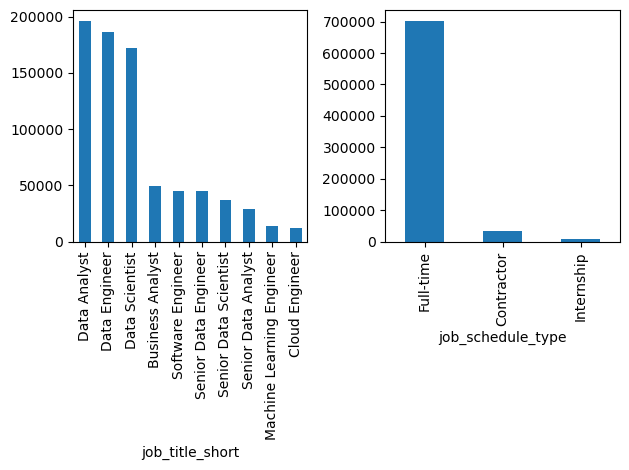

In [20]:
(fig, ax) = plt.subplots(1,2) #row,columns
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0], fig=fig)
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1], fig=fig)
fig.tight_layout()
plt.show()

In [23]:
df_skills = df.copy(deep=True)
df_skills = df_skills.explode('job_skills')
skill_count = df_skills.groupby(by=['job_skills','job_title_short']).size()
df_skills_count= skill_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False, inplace=True)

In [25]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

In [27]:
df_skills_count[df_skills_count['job_title_short'] == job_titles[0]].head(5)

job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445

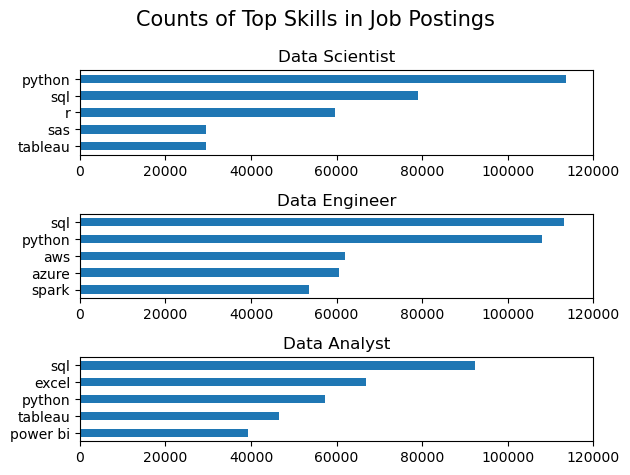

In [41]:
(fig, ax) = plt.subplots(3,1)
for (i,job_title) in enumerate(job_titles):
  df_plot= df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
  df_plot.plot(kind='barh', ax=ax[i], fig=fig, x='job_skills', y='skill_count', title=f"{job_title}")
  ax[i].invert_yaxis()
  ax[i].set_ylabel("")
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0,120_000)
  
fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout()
plt.show()  